In [3]:
!kaggle datasets download -d andrewmvd/leukemia-classification

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/leukemia-classification
License(s): other
100%|███████████████████████████████████████▉| 866M/867M [00:44<00:00, 22.2MB/s]
100%|████████████████████████████████████████| 867M/867M [00:44<00:00, 20.6MB/s]


In [4]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
import zipfile
import os

def unzip_file(zip_path, extract_path=None):
    """
    Unzips a zip file to the specified extraction path.

    :param zip_path: Path to the .zip file to be extracted.
    :param extract_path: Path where the files will be extracted to. If None, it extracts in the current directory.
    """
    # Use the current directory if no extraction path is provided
    if extract_path is None:
        extract_path = os.path.dirname(zip_path)
    
    # Open the zip file in read mode
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Extract all the contents into the directory specified by extract_path
        zip_ref.extractall(extract_path)
        print(f"Extracted to {extract_path}")

# Example usage
zip_file_path = 'leukemia-classification.zip'  # Change this to the path of your zip file
destination_path = 'leukemia-classification/'    # Change this to your desired extraction path, or leave as None to extract in the zip file's directory
unzip_file(zip_file_path, destination_path)

Extracted to leukemia-classification/


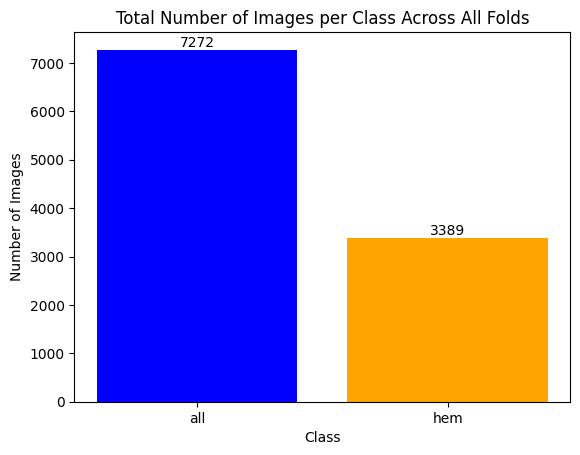

In [13]:
# Define the base directory for training data
base_dir = "leukemia-classification/C-NMC_Leukemia/training_data"

# Initialize a dictionary to hold the count of images in each class across all folds
class_counts = {'all': 0, 'hem': 0}

# Loop through each fold and add the counts to the class_counts dictionary
for fold in ['fold_0', 'fold_1', 'fold_2']:
    fold_path = os.path.join(base_dir, fold)
    for class_name in ['all', 'hem']:
        class_path = os.path.join(fold_path, class_name)
        num_images = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])
        class_counts[class_name] += num_images

# Plotting
fig, ax = plt.subplots()

# Set of different colors for the bars
colors = ['blue', 'orange']

# Plot the counts for each class
ax.bar(class_counts.keys(), class_counts.values(), color=colors)

# Adding the count above each bar
for i, (class_name, count) in enumerate(class_counts.items()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class Across All Folds')

# Show the plot
plt.show()

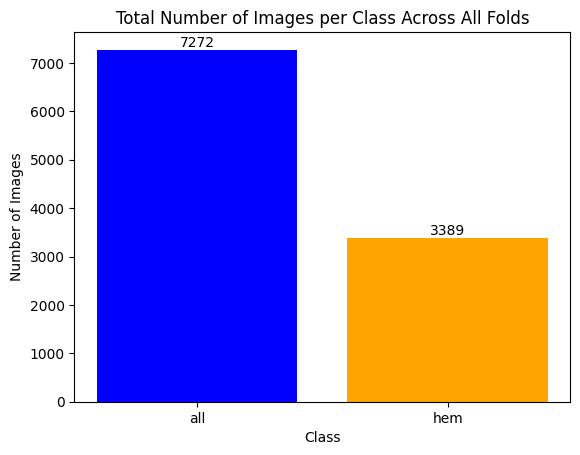

In [3]:
import os
import matplotlib.pyplot as plt
import albumentations as A
from albumentations import ImageOnlyTransform

# Define the base directory for training data
base_dir = "leukemia-classification/C-NMC_Leukemia/training_data"

# Initialize a dictionary to hold the count of images in each class across all folds
class_counts = {'all': 0, 'hem': 0}

# Data augmentation settings with Albumentations
augmentation_transform = A.Compose([
    A.GaussianBlur(blur_limit=(3, 7), p=1.0),
])

# Loop through each fold and add the counts to the class_counts dictionary
for fold in ['fold_0', 'fold_1', 'fold_2']:
    fold_path = os.path.join(base_dir, fold)

    for class_name in ['all', 'hem']:
        class_path = os.path.join(fold_path, class_name)
        num_images = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])

        # Augment the 'hem' class images
        if class_name == 'hem':
            # Create a directory to store augmented images
            augmented_path = os.path.join(fold_path, 'augmented_' + class_name)
            os.makedirs(augmented_path, exist_ok=True)

            # Apply augmentation and save augmented images using Albumentations
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)
                img = plt.imread(image_path)

                # Apply augmentation
                augmented_img = augmentation_transform(image=img)['image']

                # Save augmented image
                augmented_image_path = os.path.join(augmented_path, f'aug_{image_name}')
                plt.imsave(augmented_image_path, augmented_img)

        class_counts[class_name] += num_images

# Plotting
fig, ax = plt.subplots()

# Set of different colors for the bars
colors = ['blue', 'orange']

# Plot the counts for each class
ax.bar(class_counts.keys(), class_counts.values(), color=colors)

# Adding the count above each bar
for i, (class_name, count) in enumerate(class_counts.items()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class Across All Folds')

# Show the plot
plt.show()

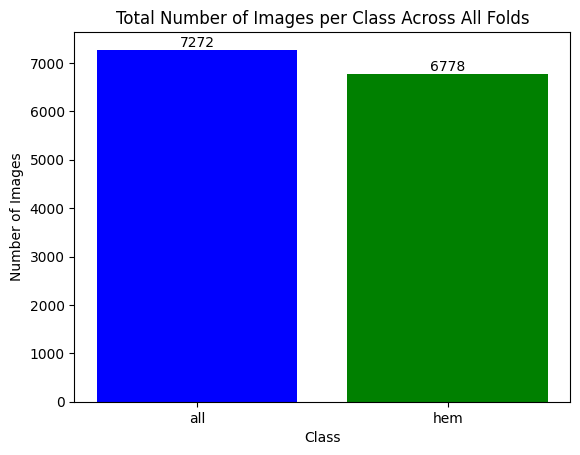

In [6]:
# Define the base directory for training data
base_dir = "leukemia-classification/C-NMC_Leukemia/training_data"

# Initialize a dictionary to hold the count of images in each class across all folds
# Now includes 'hem' to accumulate counts from 'hem' and 'augmented_hem'
class_counts = {'all': 0, 'hem': 0}

# Loop through each fold and add the counts to the class_counts dictionary
for fold in ['fold_0', 'fold_1', 'fold_2']:
    fold_path = os.path.join(base_dir, fold)
    # Loop through the classes, 'augmented_hem' counts are added to 'hem'
    for class_name in ['all', 'hem', 'augmented_hem']:
        class_path = os.path.join(fold_path, class_name)
        # Check if the class_path exists to accommodate for 'hem' and 'augmented_hem'
        if os.path.exists(class_path):
            num_images = len([name for name in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, name))])
            # 'augmented_hem' counts are added to 'hem'
            if class_name == 'augmented_hem':
                class_counts['hem'] += num_images
            else:
                class_counts[class_name] += num_images

# Plotting
fig, ax = plt.subplots()

# Set of different colors for the bars
colors = ['blue', 'green']

# Plot the counts for each class, removing 'augmented_hem' from the plot
ax.bar(class_counts.keys(), class_counts.values(), color=colors)

# Adding the count above each bar
for i, (class_name, count) in enumerate(class_counts.items()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Total Number of Images per Class Across All Folds')

# Show the plot
plt.show()


In [8]:
# import os
# import shutil

# def restructure_dataset(src_dir, dest_dir):
#     # Define the main categories and their new mappings
#     categories = {
#         'all': 'all',
#         'hem': 'hem',
#         'augmented_hem': 'hem'
#     }
    
#     # Iterate through main data types (training, testing, validation)
#     for data_type in ['training_data', 'testing_data', 'validation_data']:
#         print(f"Processing {data_type}...")
#         src_data_path = os.path.join(src_dir, data_type)
#         dest_data_path = os.path.join(dest_dir, data_type)
        
#         # Iterate through each fold
#         for fold in ['fold_0', 'fold_1', 'fold_2']:
#             fold_path = os.path.join(src_data_path, fold)
            
#             # Iterate through each category within the fold
#             for original_category, new_category in categories.items():
#                 category_path = os.path.join(fold_path, original_category)
                
#                 if os.path.exists(category_path):
#                     for image_name in os.listdir(category_path):
#                         src_image_path = os.path.join(category_path, image_name)
#                         dest_image_path = os.path.join(dest_data_path, new_category, image_name)
                        
#                         # Ensure destination directory exists
#                         os.makedirs(os.path.dirname(dest_image_path), exist_ok=True)
                        
#                         # Move the image
#                         shutil.move(src_image_path, dest_image_path)
#                         print(f"Moved {src_image_path} to {dest_image_path}")

# # Define source and destination directories
# src_dir = 'leukemia-classification/C-NMC_Leukemia'
# dest_dir = 'leukemia-classification/C-NMC_Leukemia_restructure'

# restructure_dataset(src_dir, dest_dir)

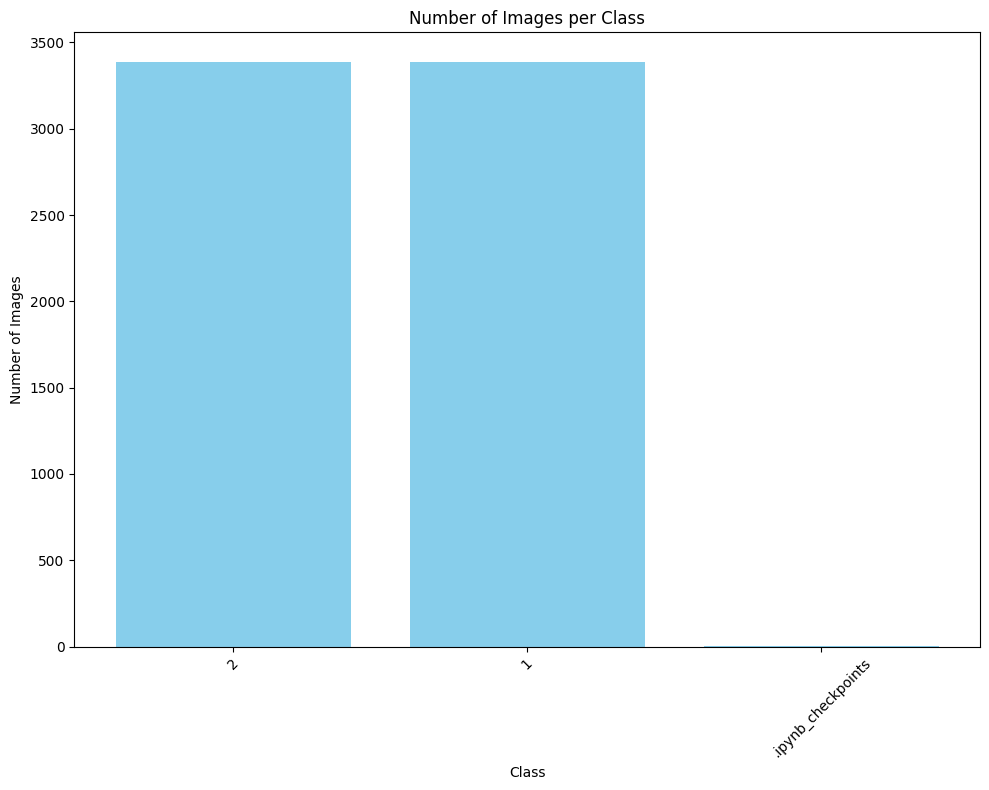

In [9]:

# Base path for the dataset
base_path = 'leukemia-classification/C-NMC_Leukemia_restructure/training_data/hem/'

# Listing all class folders
class_folders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]

# Initialize lists to store class names and image counts
class_names = []
image_counts = []

# Iterate through each class folder
for class_folder in class_folders:
    class_path = os.path.join(base_path, class_folder)
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    
    # Counting the number of images and adding to the list
    num_images = len(image_files)
    class_names.append(class_folder)
    image_counts.append(num_images)

# Plotting the bar graph
plt.figure(figsize=(10, 8))  # Set the figure size for better readability
plt.bar(class_names, image_counts, color='skyblue')  # Create a bar plot
plt.xlabel('Class')  # Label for X-axis
plt.ylabel('Number of Images')  # Label for Y-axis
plt.title('Number of Images per Class')  # Title of the plot
plt.xticks(rotation=45)  # Rotate class names for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()  # Display the plot

In [6]:
import os
import shutil

# Define the base path for the images
base_path = "leukemia-classification/C-NMC_Leukemia_restructure/training_data/hem"

# Create target directories if they don't already exist
target_dir_1 = os.path.join(base_path, "1")
target_dir_2 = os.path.join(base_path, "2")

os.makedirs(target_dir_1, exist_ok=True)
os.makedirs(target_dir_2, exist_ok=True)

# List all files in the base directory
files = [f for f in os.listdir(base_path) if os.path.isfile(os.path.join(base_path, f))]

# Split files between the two directories
for i, file in enumerate(files):
    # Determine the target directory based on even/odd index
    target_dir = target_dir_1 if i % 2 == 0 else target_dir_2
    
    # Move (or copy, if preferred) the file to the target directory
    shutil.move(os.path.join(base_path, file), os.path.join(target_dir, file))
    # If you prefer to copy instead of move, use shutil.copy() instead

print("Files have been distributed between the two directories.")

Files have been distributed between the two directories.


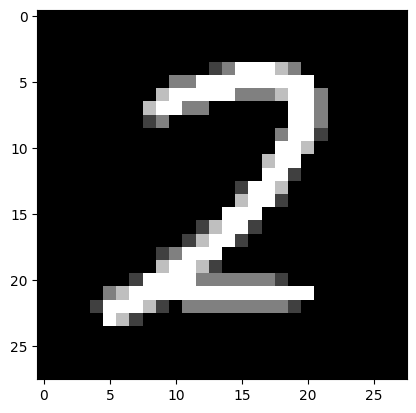

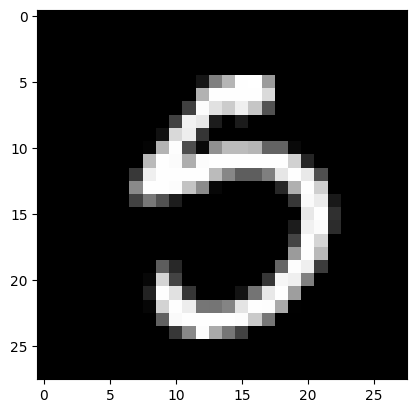

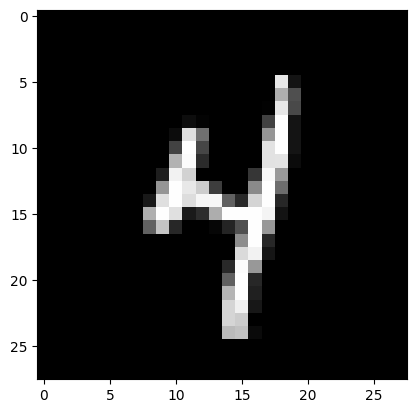

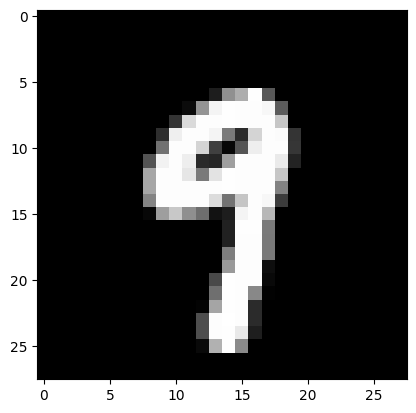

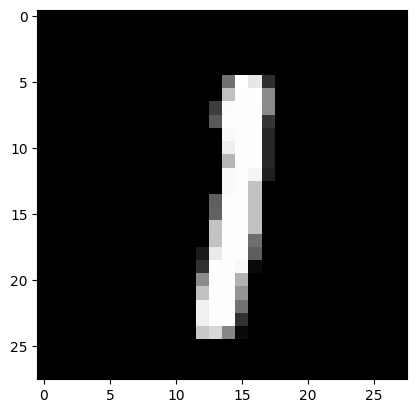

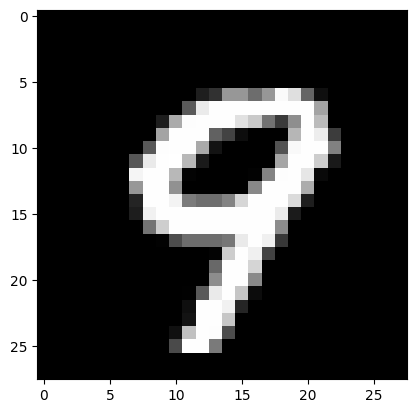

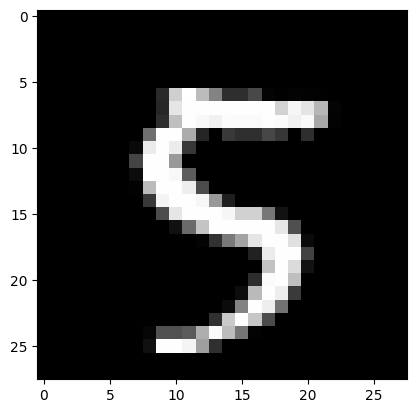

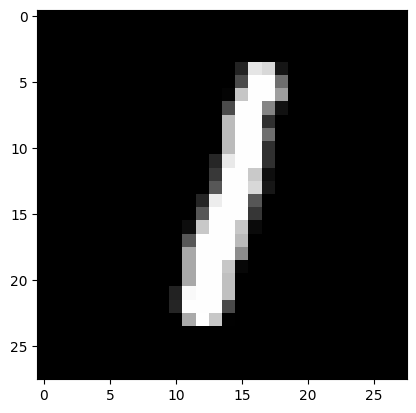

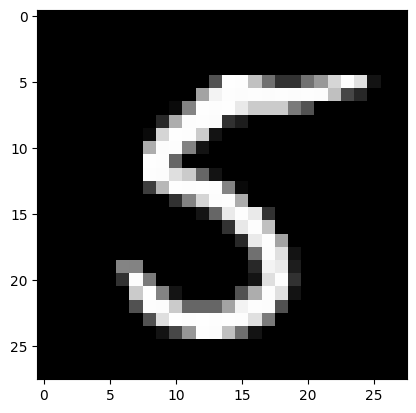

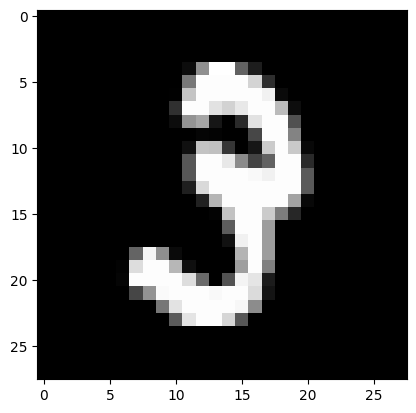

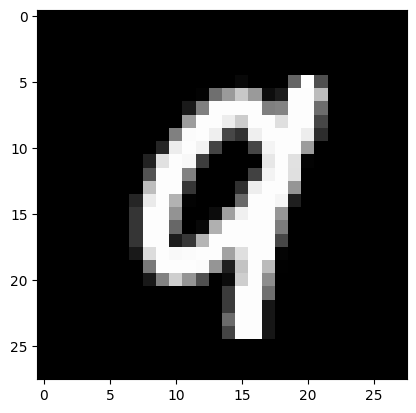

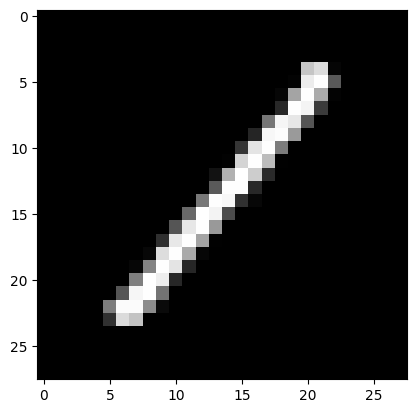

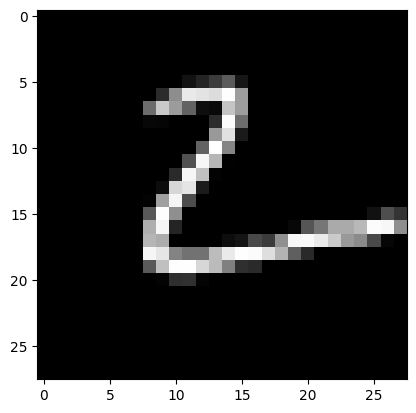

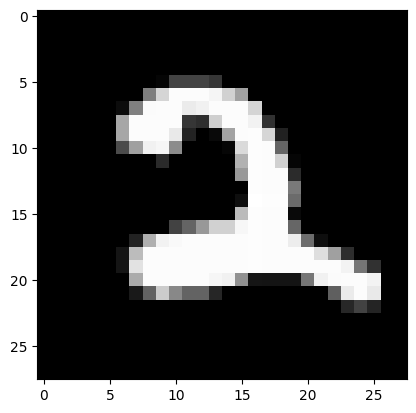

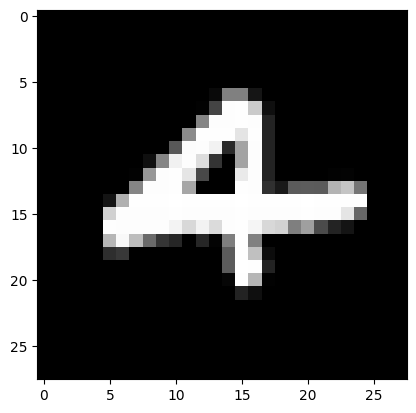

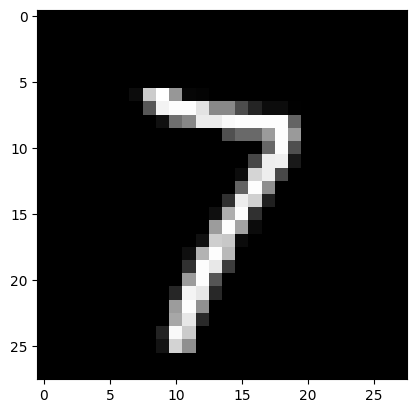

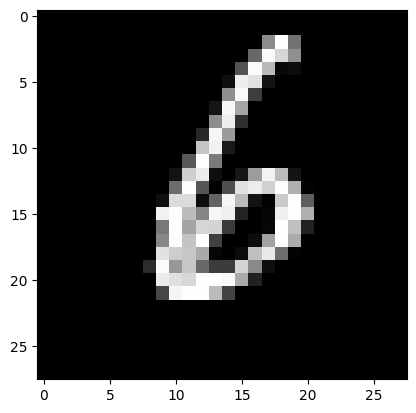

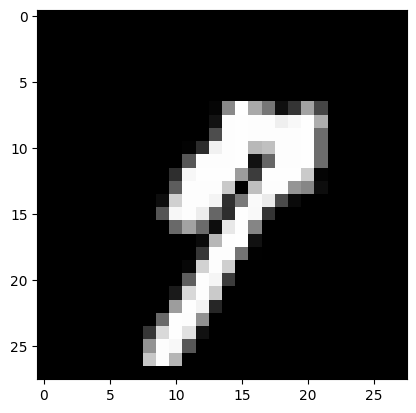

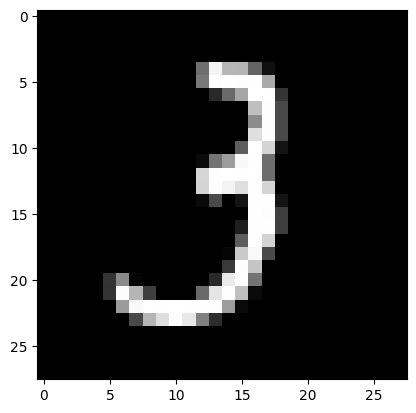

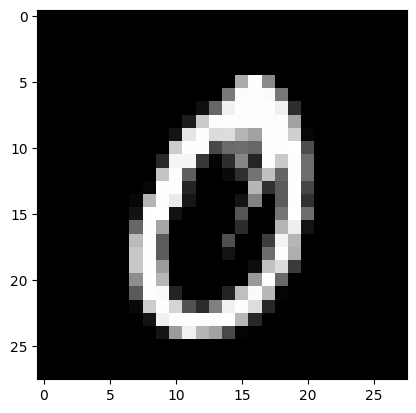

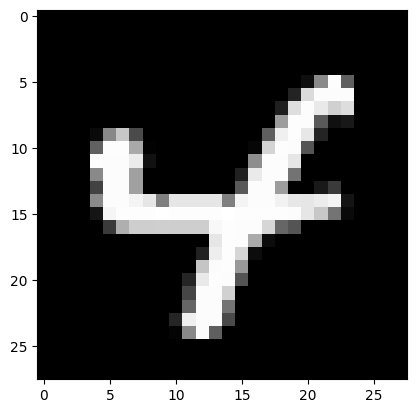

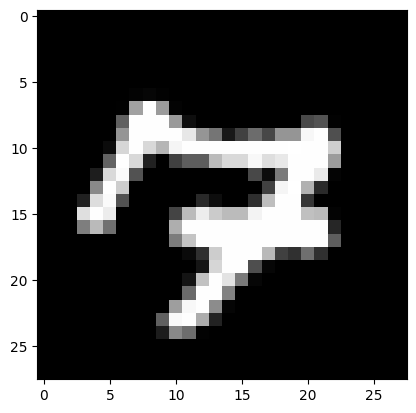

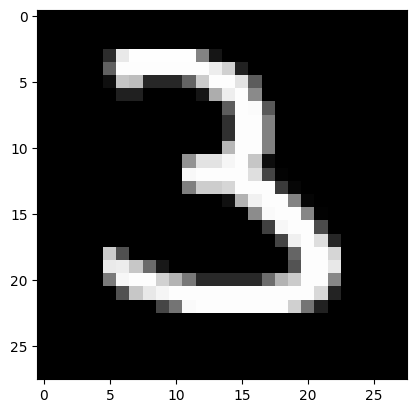

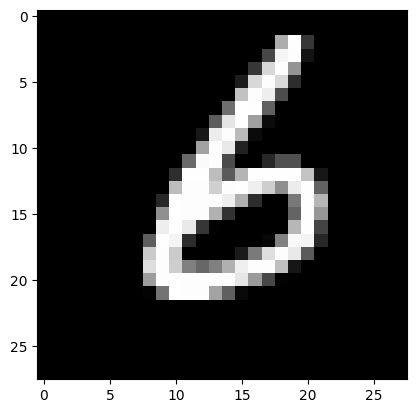

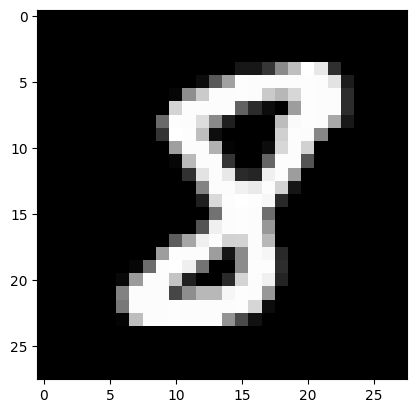

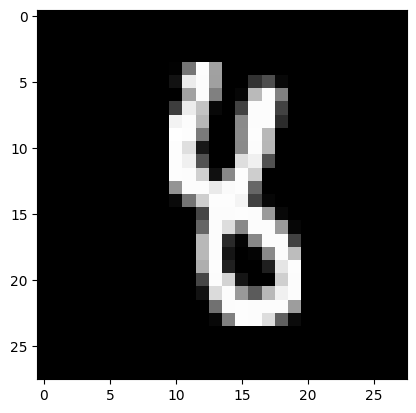

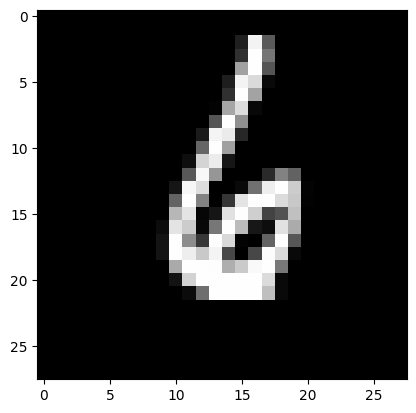

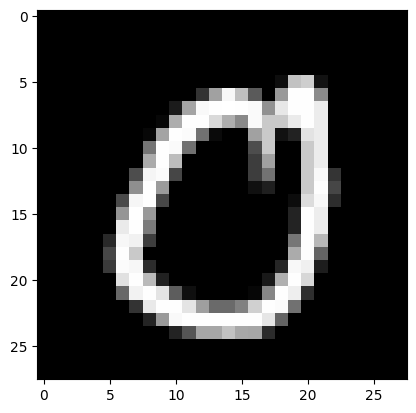

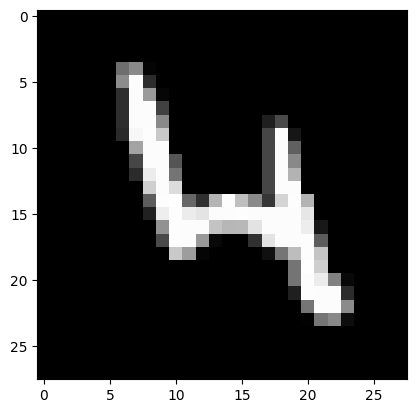

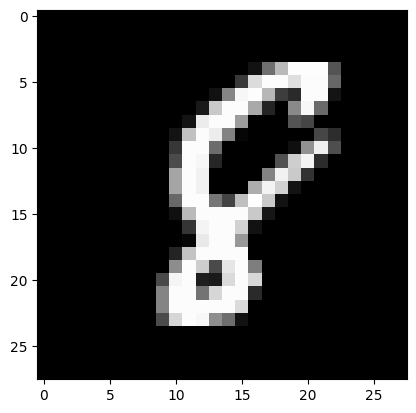

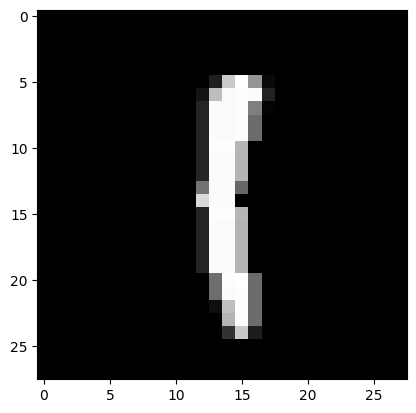

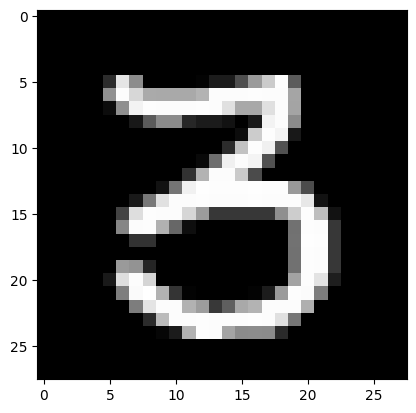

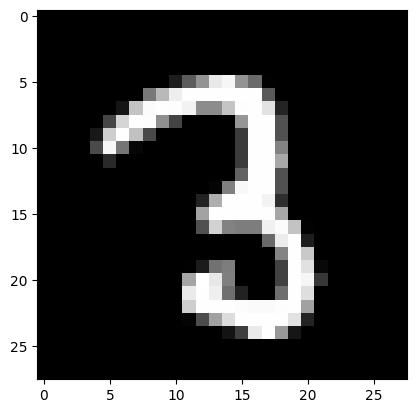

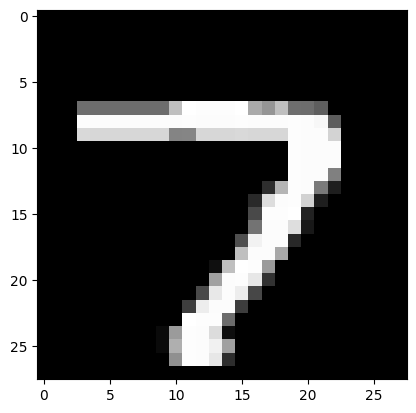

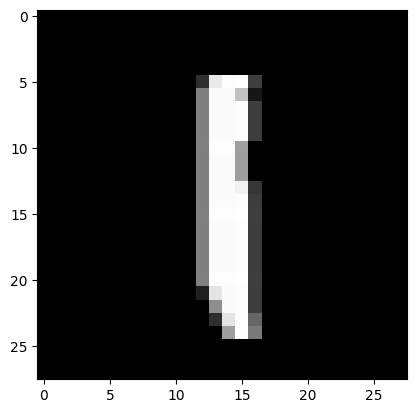

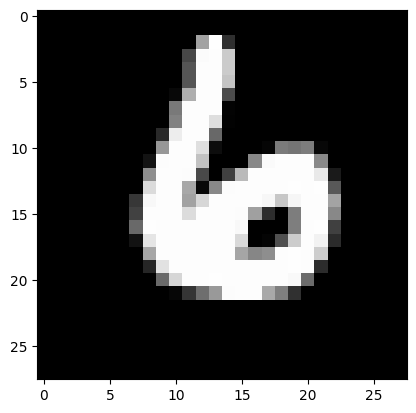

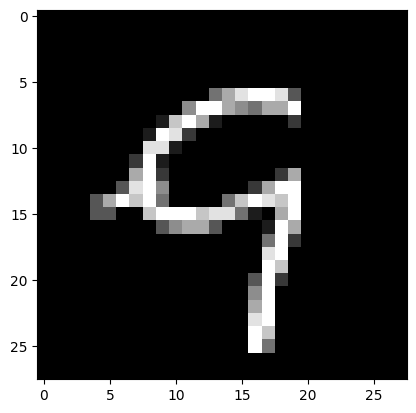

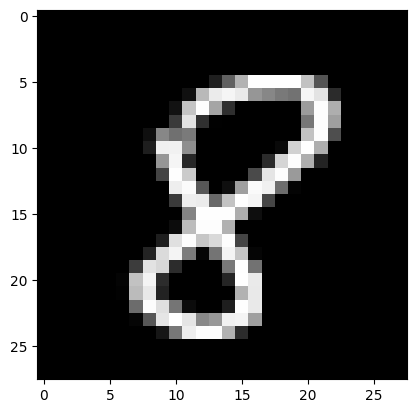

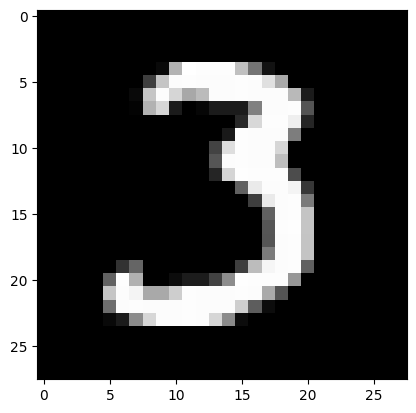

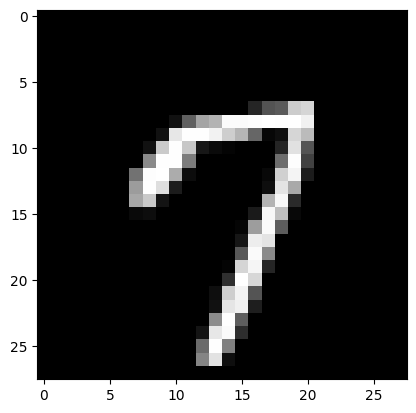

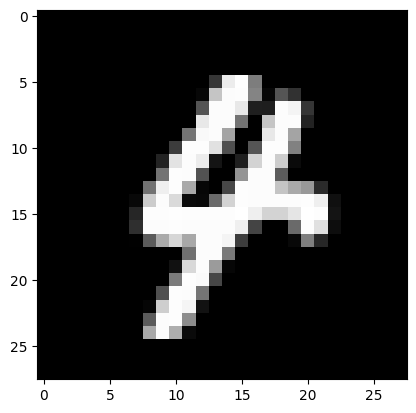

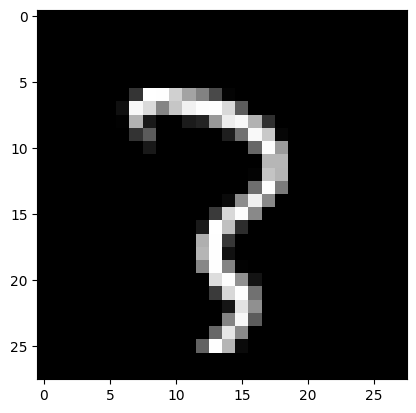

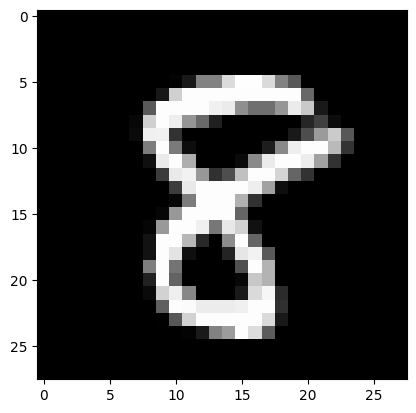

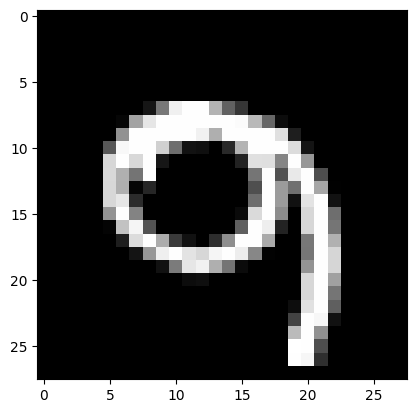

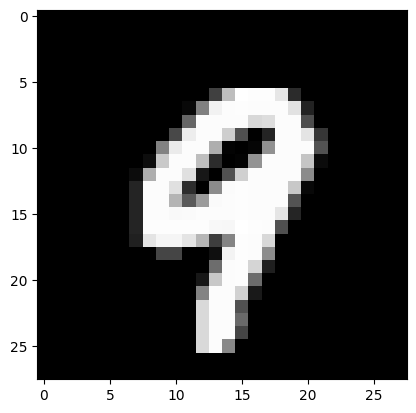

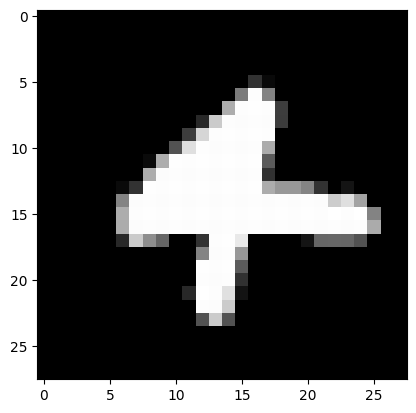

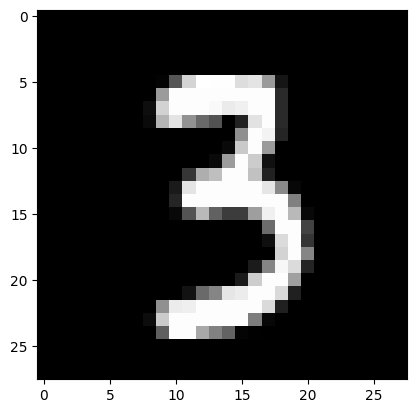

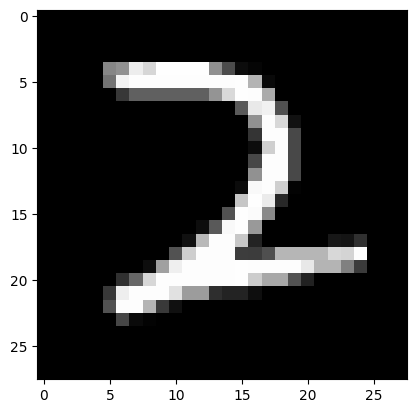

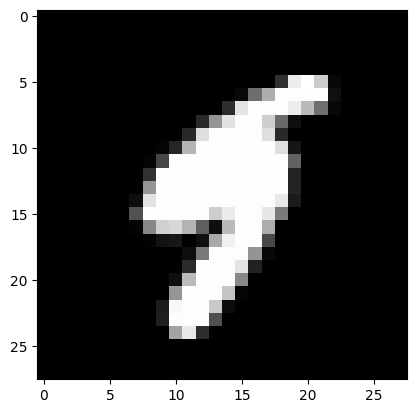

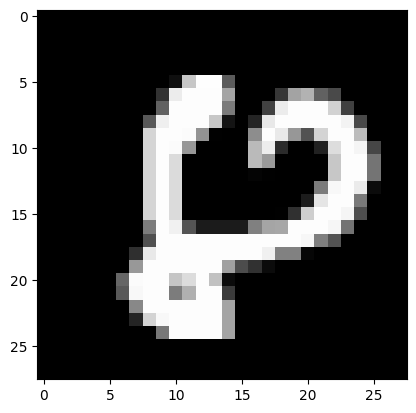

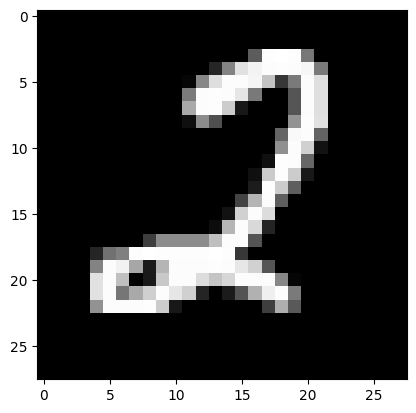

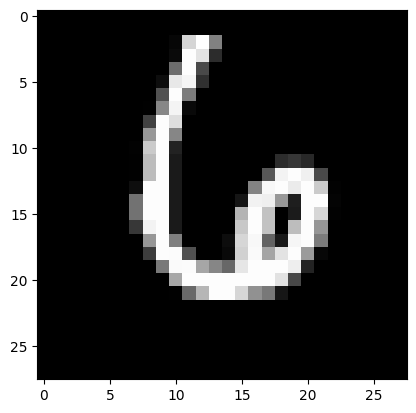

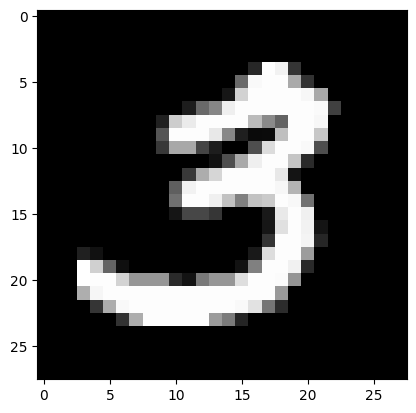

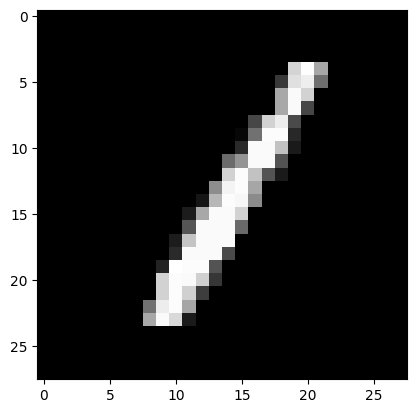

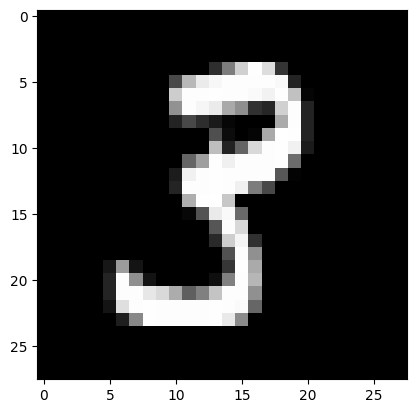

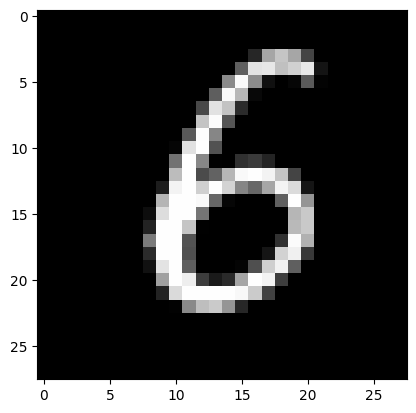

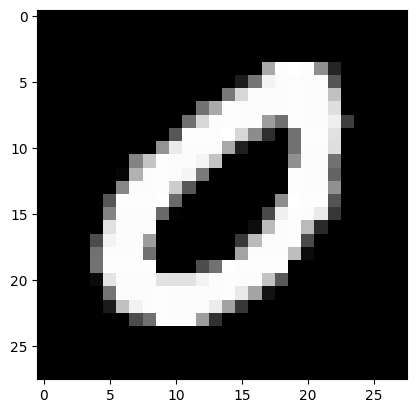

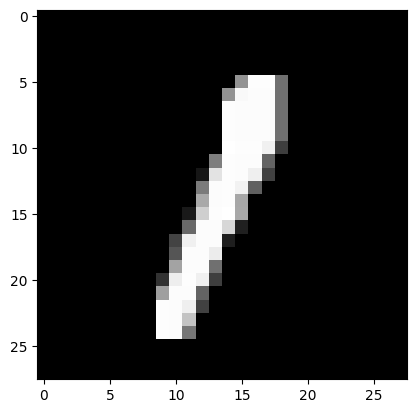

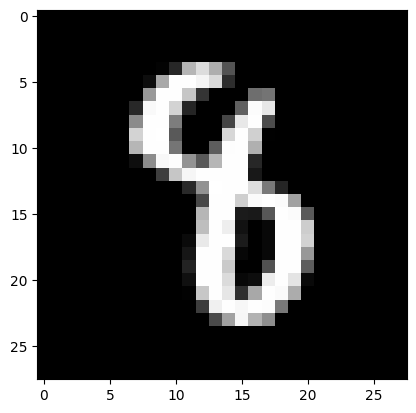

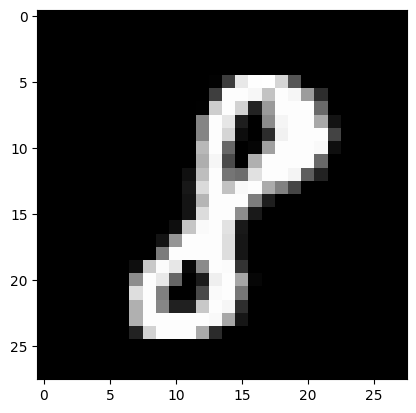

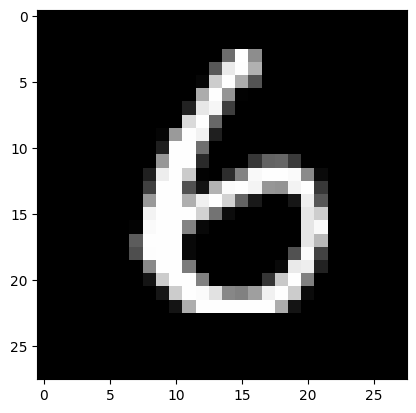

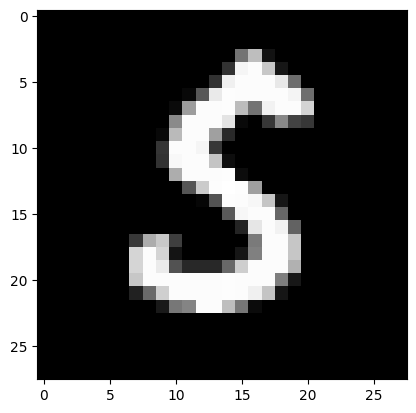

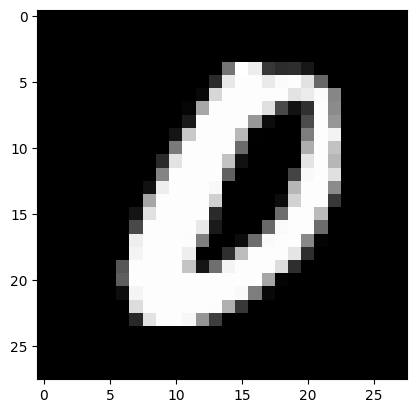

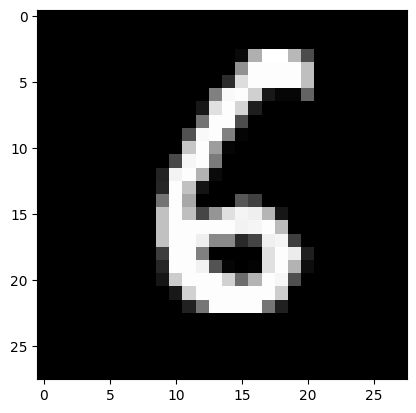

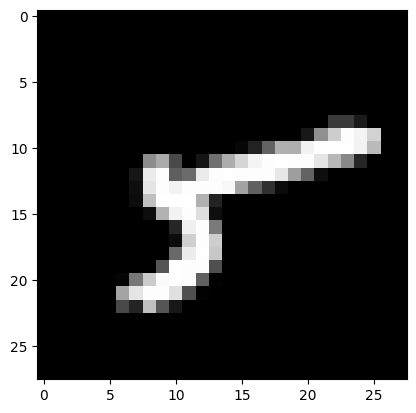

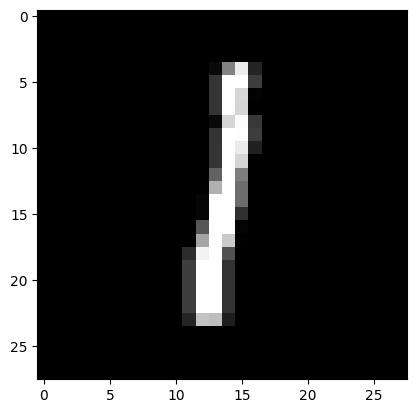

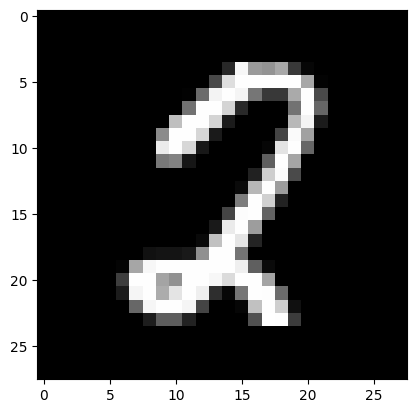

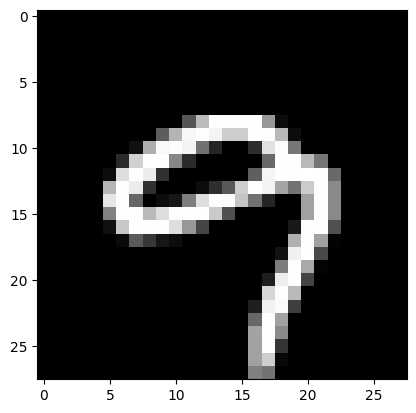

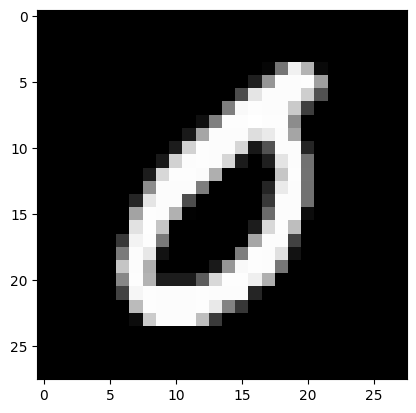

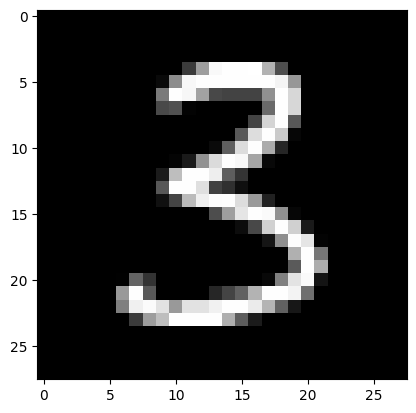

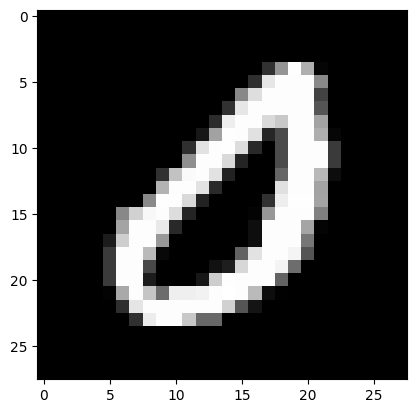

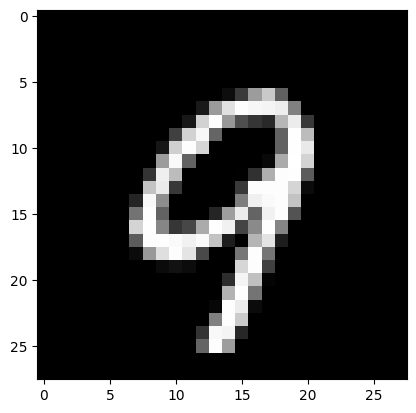

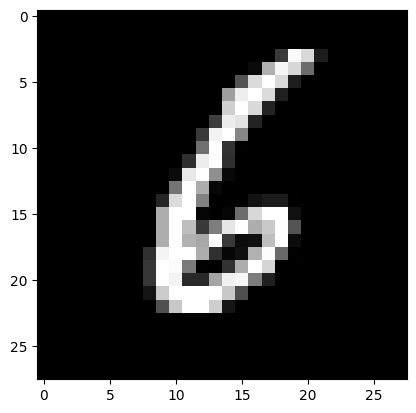

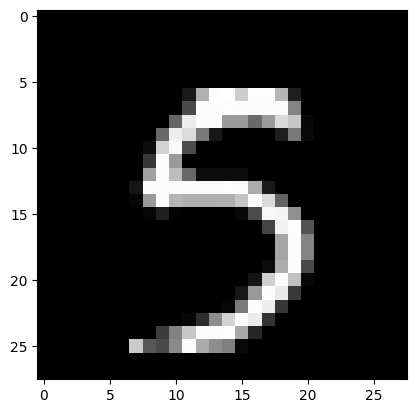

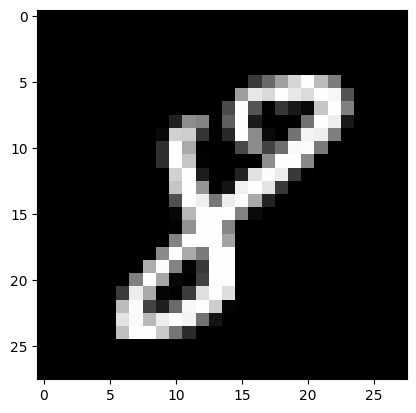

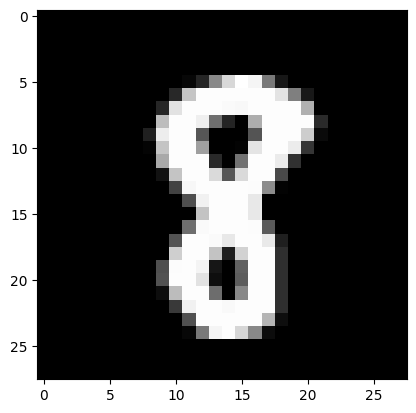

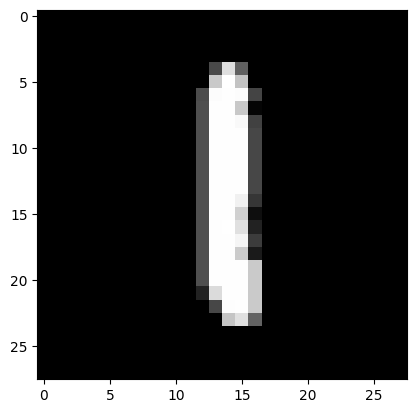

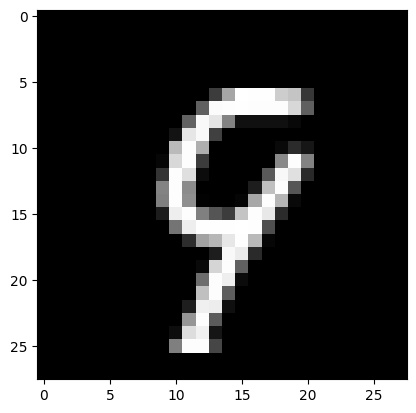

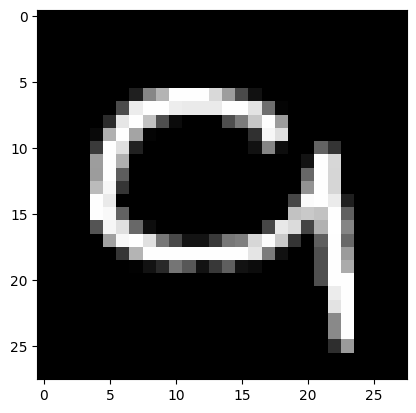

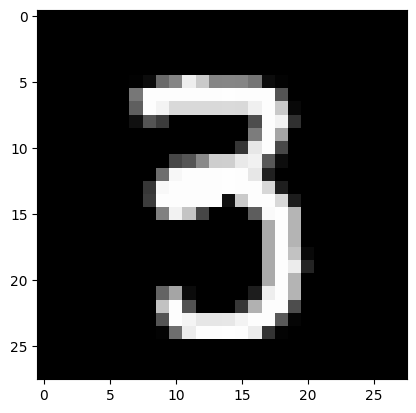

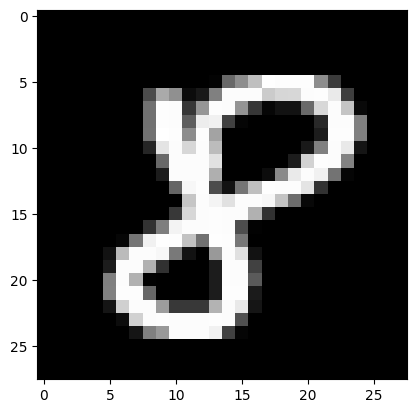

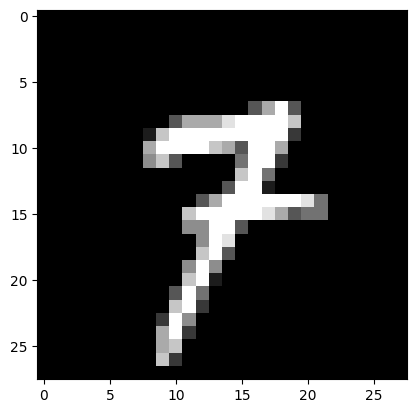

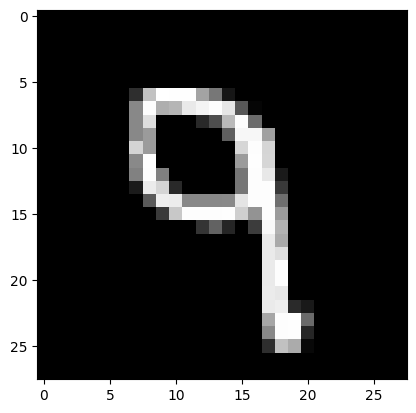

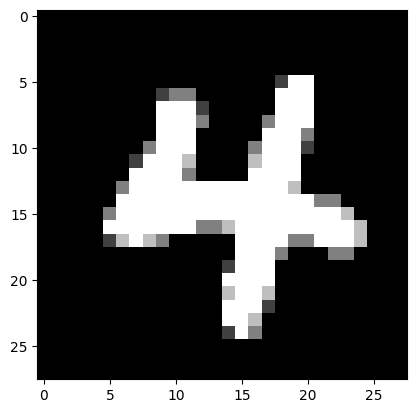

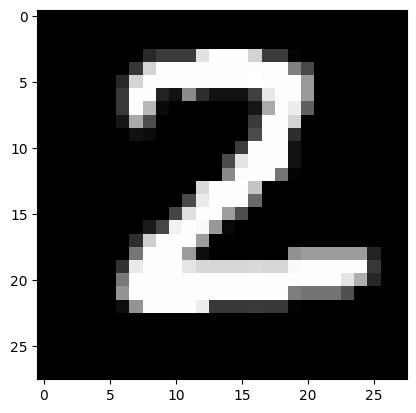

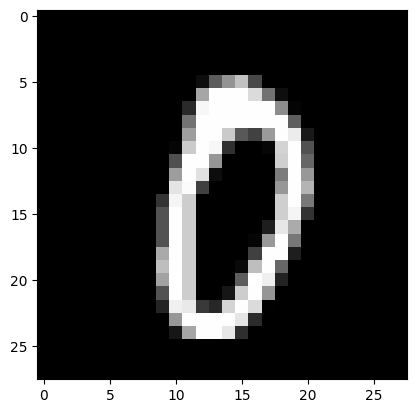

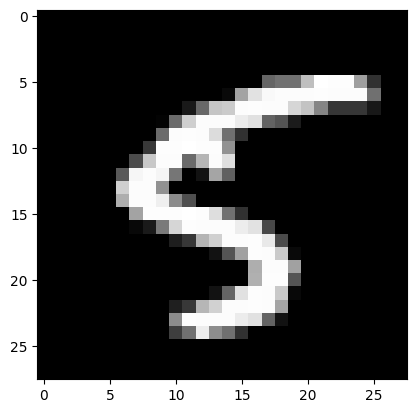

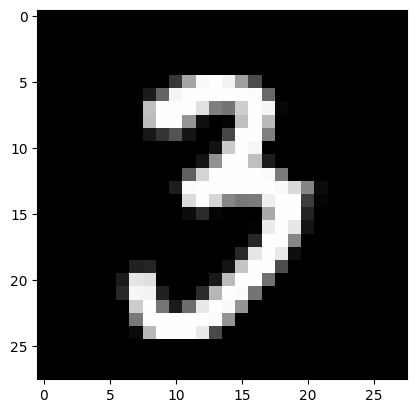

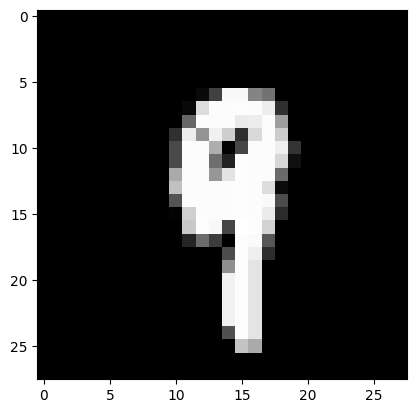

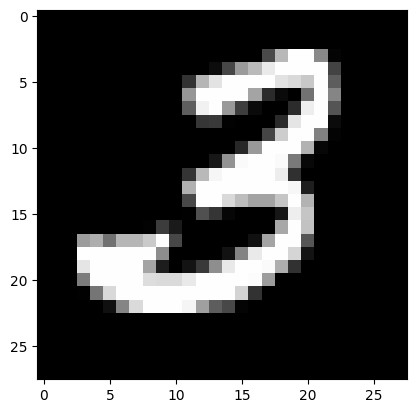

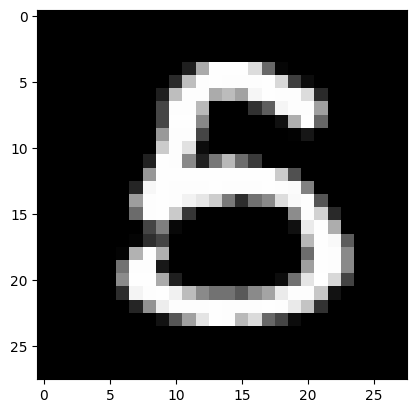

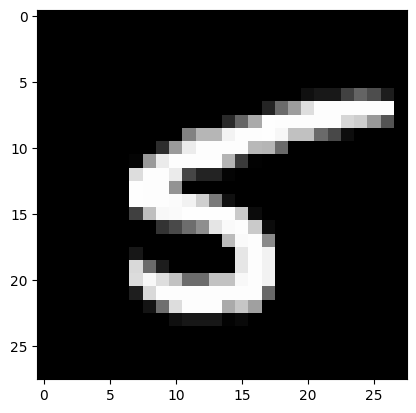

In [ ]:
import argparse
import os
import numpy as np
import math

import torchvision.transforms as transforms
from torchvision.utils import save_image

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.datasets import ImageFolder
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision

import matplotlib.pyplot as plt

# dataset_path = 'leukemia-classification/C-NMC_Leukemia_restructure/training_data/'


# transform = transforms.Compose([
#     transforms.Grayscale(num_output_channels=1),  # Convert images to grayscale
#     transforms.ToTensor(),
#     transforms.Normalize([0.5], [0.5])  # Assuming you want to normalize the single channel
# ])


# dataset = ImageFolder(root=dataset_path, transform=transform)


# dataloader = DataLoader(
#     dataset,
#     shuffle=True,
# )


cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor


dataloader = torch.utils.data.DataLoader(
    datasets.MNIST(
        "../../data/mnist",
        train=True,
        download=True,
        transform=transforms.Compose(
            [transforms.ToTensor(), transforms.Normalize([0.5], [0.5])]
        ),
    ),
    shuffle=True,
)


# dataiter = iter(dataloader)


# # Use the next() function to fetch the next batch
# images, labels = next(dataiter)

# print(labels)

# # Function to show an image
def imshow(img):
    # unnormalize
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# # Show images
# imshow(torchvision.utils.make_grid(images))
# # Print labels
# print(' '.join(f'{labels[j]}' for j in range(len(images))))


for i, (imgs, _) in enumerate(dataloader):
    # imshow(torchvision.utils.make_grid(imgs))
    # valid = Variable(Tensor(imgs.shape[0], 1).fill_(1.0), requires_grad=False)
    # fake = Variable(Tensor(imgs.shape[0], 1).fill_(0.0), requires_grad=False)

In [10]:
# import shutil
# import os

# # Define the path to the folder you want to delete
# folder_path = "images_GANs_merge_class"

# # Check if the folder exists
# if os.path.exists(folder_path) and os.path.isdir(folder_path):
#     # Use shutil.rmtree to delete the folder and all its contents
#     shutil.rmtree(folder_path)
#     print(f"The folder '{folder_path}' has been deleted successfully.")
# else:
#     print(f"The folder '{folder_path}' does not exist or is not a directory.")


The folder 'images_GANs_merge_class' has been deleted successfully.


In [25]:
dataloader